# Analyse sources

 work with Weakly_2023_44
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/12/22
- update : 2023/12/22


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
filesource_in="sourceTable_202312.csv"

In [3]:
df = pd.read_csv(filesource_in)

In [4]:
df

,sourceId,coord_ra,coord_dec,ccdVisitId,parentSourceId,x,y,xErr,yErr,ra,...,hsmShapeRegauss_flag_parent_source,sky_source,detect_isPrimary,visit,detector,band,physical_filter,visid_idx,dateobs,mjd
0,175077975606165505,270.123104,-25.026300,41741842176,0,28.000000,36.000000,NaN,NaN,270.123104,...,False,False,True,2023081700503,0,g,SDSSg_65mm~empty,0,2023-08-18 04:24:02.590,60174.183363
1,175077975606165506,270.146958,-25.025264,41741842176,0,841.356901,65.210897,0.281312,0.237931,270.146958,...,False,False,True,2023081700503,0,g,SDSSg_65mm~empty,0,2023-08-18 04:24:02.590,60174.183363
2,175077975606165507,270.185965,-25.025121,41741842176,0,2170.703580,54.321945,0.036102,0.031955,270.185965,...,False,False,True,2023081700503,0,g,SDSSg_65mm~empty,0,2023-08-18 04:24:02.590,60174.183363
3,175077975606165508,270.214024,-25.025078,41741842176,0,3126.911888,43.979312,0.029372,0.025076,270.214024,...,False,False,True,2023081700503,0,g,SDSSg_65mm~empty,0,2023-08-18 04:24:02.590,60174.183363
4,175077975606165509,270.227852,-25.025344,41741842176,0,3598.000000,28.000000,NaN,NaN,270.227852,...,False,False,True,2023081700503,0,g,SDSSg_65mm~empty,0,2023-08-18 04:24:02.590,60174.183363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356234,173564928421003511,239.968725,-24.021877,41381103616,0,3036.000000,2263.000000,0.408922,1.784359,239.968725,...,False,True,False,2023070500392,0,r,SDSSr_65mm~empty,1654,2023-07-06 05:09:56.474,60131.215237
1356235,173564928421003512,239.889064,-24.040724,41381103616,173564928421003314,291.000000,1588.000000,NaN,NaN,239.889064,...,False,False,True,2023070500392,0,r,SDSSr_65mm~empty,1654,2023-07-06 05:09:56.474,60131.215237
1356236,173564928421003513,239.890572,-24.039843,41381103616,173564928421003314,343.218442,1620.530783,0.385652,0.532531,239.890572,...,False,False,True,2023070500392,0,r,SDSSr_65mm~empty,1654,2023-07-06 05:09:56.474,60131.215237
1356237,173564928421003514,239.907872,-23.984627,41381103616,173564928421003401,963.000000,3690.000000,NaN,NaN,239.907872,...,False,False,True,2023070500392,0,r,SDSSr_65mm~empty,1654,2023-07-06 05:09:56.474,60131.215237


In [5]:
colnames = list(df.columns)
for name in colnames:
    print(name)

sourceId
coord_ra
coord_dec
ccdVisitId
parentSourceId
x
y
xErr
yErr
ra
dec
decl
raErr
decErr
ra_dec_Cov
calibFlux
calibFluxErr
ap03Flux
ap03FluxErr
ap03Flux_flag
ap06Flux
ap06FluxErr
ap06Flux_flag
ap09Flux
ap09FluxErr
ap09Flux_flag
ap12Flux
ap12FluxErr
ap12Flux_flag
ap17Flux
ap17FluxErr
ap17Flux_flag
ap25Flux
ap25FluxErr
ap25Flux_flag
ap35Flux
ap35FluxErr
ap35Flux_flag
ap50Flux
ap50FluxErr
ap50Flux_flag
ap70Flux
ap70FluxErr
ap70Flux_flag
sky
skyErr
psfFlux
psfFluxErr
ixx
iyy
ixy
ixxPSF
iyyPSF
ixyPSF
ixxDebiasedPSF
iyyDebiasedPSF
ixyDebiasedPSF
gaussianFlux
gaussianFluxErr
extendedness
localPhotoCalib
localPhotoCalib_flag
localPhotoCalibErr
localWcs_flag
localWcs_CDMatrix_2_1
localWcs_CDMatrix_1_1
localWcs_CDMatrix_1_2
localWcs_CDMatrix_2_2
blendedness_abs
blendedness_flag
blendedness_flag_noCentroid
blendedness_flag_noShape
apFlux_12_0_flag
apFlux_12_0_flag_apertureTruncated
apFlux_12_0_flag_sincCoeffsTruncated
apFlux_12_0_instFlux
apFlux_12_0_instFluxErr
apFlux_17_0_flag
apFlux_17_0_i

In [6]:
df_sel = df[['sourceId','ccdVisitId','x','y','ra','dec','coord_ra','coord_dec','psfFlux','gaussianFlux','visit','band','visid_idx','mjd','dateobs','extendedness_flag','detect_isPrimary']]

In [7]:
def convert_fluxtomag(x) :
    """
    The object and source catalogs store only fluxes. There are hundreds of flux-related columns, 
    and to store them also as magnitudes would be redundant, and a waste of space.
    All flux units are nanojanskys. The AB Magnitudes Wikipedia page provides a concise resource 
    for users unfamiliar with AB magnitudes and jansky fluxes. To convert to AB magnitudes use:
    As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:
    results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
    results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4
    (from DP0 tutorial)
    """
    return -2.50 * np.log10(x) + 31.4

In [8]:
df_sel["psfMag"] =  df_sel['psfFlux'].map(convert_fluxtomag)
#df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(lambda x:-2.50 * np.log10(x) + 31.4)
df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(convert_fluxtomag)

/tmp/ipykernel_57603/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_57603/1754447433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["psfMag"] =  df_sel['psfFlux'].map(convert_fluxtomag)
/tmp/ipykernel_57603/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_57603/4088867659.py:12: RuntimeWarning: divide by zero encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_57603/1754447433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [9]:
df_sel = df_sel[df_sel['extendedness_flag']==False & df_sel['detect_isPrimary']]

In [10]:
df_sel.dropna(axis=0,inplace = True)

In [11]:
df_sel

,sourceId,ccdVisitId,x,y,ra,dec,coord_ra,coord_dec,psfFlux,gaussianFlux,visit,band,visid_idx,mjd,dateobs,extendedness_flag,detect_isPrimary,psfMag,gaussianMag
1,175077975606165506,41741842176,841.356901,65.210897,270.146958,-25.025264,270.146958,-25.025264,3.366124e+05,3.168502e+05,2023081700503,g,0,60174.183363,2023-08-18 04:24:02.590,False,True,17.582175,17.647865
2,175077975606165507,41741842176,2170.703580,54.321945,270.185965,-25.025121,270.185965,-25.025121,6.586356e+06,6.570193e+06,2023081700503,g,0,60174.183363,2023-08-18 04:24:02.590,False,True,14.353387,14.356055
3,175077975606165508,41741842176,3126.911888,43.979312,270.214024,-25.025078,270.214024,-25.025078,9.822913e+06,9.988077e+06,2023081700503,g,0,60174.183363,2023-08-18 04:24:02.590,False,True,13.919399,13.901295
7,175077975606165512,41741842176,1136.737815,77.837438,270.155620,-25.024833,270.155620,-25.024833,1.111982e+07,1.124821e+07,2023081700503,g,0,60174.183363,2023-08-18 04:24:02.590,False,True,13.784755,13.772291
8,175077975606165513,41741842176,253.992175,43.871652,270.129732,-25.026019,270.129732,-25.026019,5.221035e+04,4.976749e+04,2023081700503,g,0,60174.183363,2023-08-18 04:24:02.590,False,True,19.605608,19.657636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356127,173564928421003404,41381103616,3263.359481,3841.062698,239.974754,-23.979849,239.974754,-23.979849,2.466551e+06,2.476360e+06,2023070500392,r,1654,60131.215237,2023-07-06 05:09:56.474,False,True,15.419775,15.415465
1356129,173564928421003406,41381103616,401.861693,3868.481445,239.891480,-23.980064,239.891480,-23.980064,1.708894e+06,1.702699e+06,2023070500392,r,1654,60131.215237,2023-07-06 05:09:56.474,False,True,15.818212,15.822155
1356132,173564928421003409,41381103616,1794.524149,3930.372878,239.931981,-23.977965,239.931981,-23.977965,4.066133e+05,4.336070e+05,2023070500392,r,1654,60131.215237,2023-07-06 05:09:56.474,False,True,17.377046,17.307259
1356236,173564928421003513,41381103616,343.218442,1620.530783,239.890572,-24.039843,239.890572,-24.039843,9.239805e+04,8.639326e+04,2023070500392,r,1654,60131.215237,2023-07-06 05:09:56.474,False,True,18.985843,19.058800


<Axes: xlabel='x', ylabel='y'>

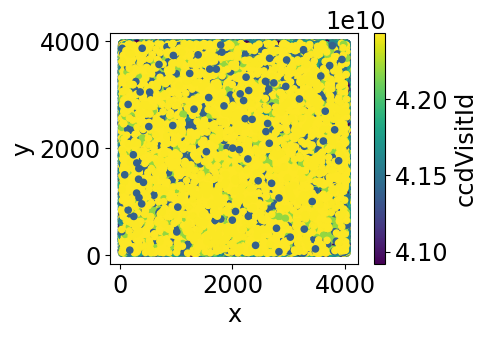

In [12]:
df_sel.plot.scatter('x','y',c='ccdVisitId',colormap='viridis')

<Axes: xlabel='ra', ylabel='dec'>

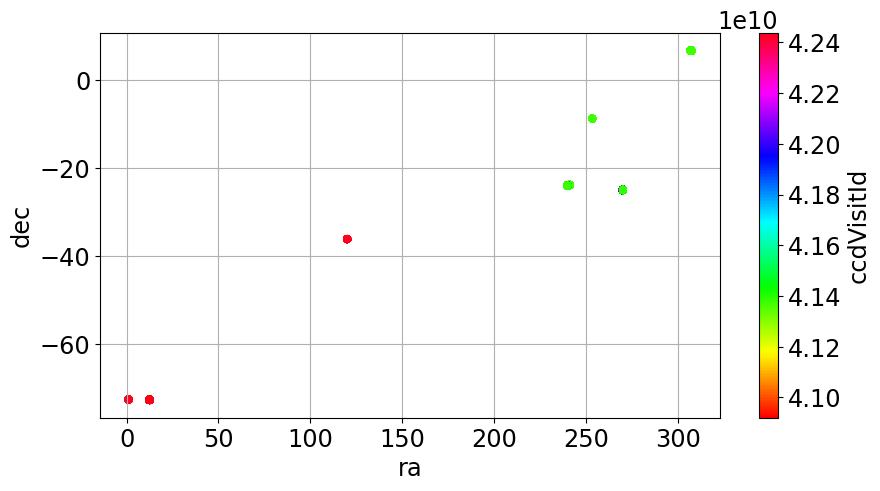

In [27]:
df_sel.plot.scatter('ra','dec',c='ccdVisitId',colormap='hsv',grid=True,figsize=(10,5))

<Axes: xlabel='coord_ra', ylabel='coord_dec'>

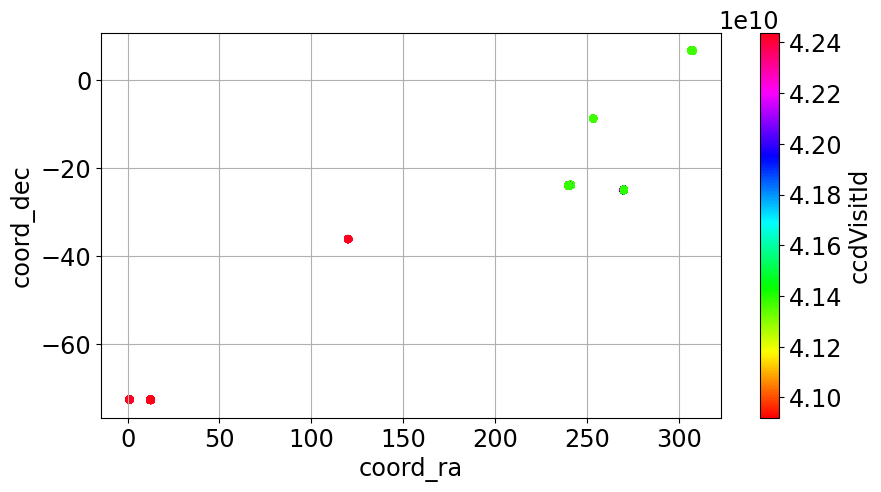

In [26]:
df_sel.plot.scatter('coord_ra','coord_dec',c='ccdVisitId',colormap='hsv',grid=True,figsize=(10,5))

<Axes: title={'center': 'coord_ra'}, ylabel='Frequency'>

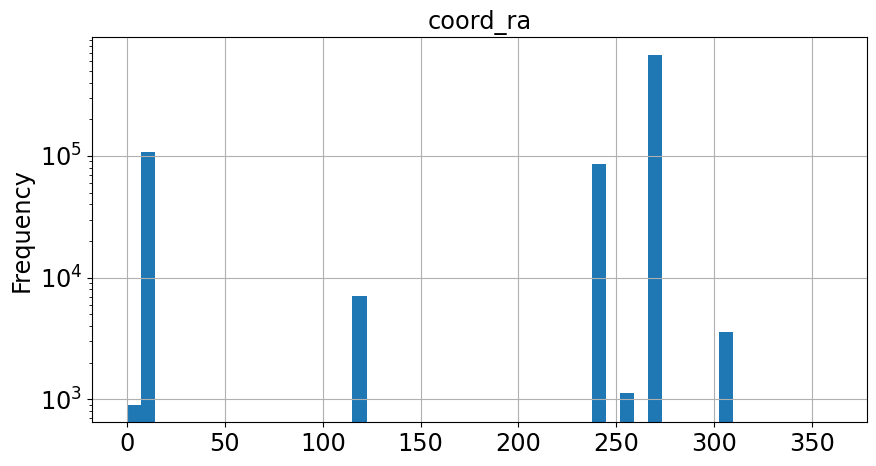

In [25]:
df_sel['coord_ra'].plot(kind="hist",bins=50 ,range=(0,360),logy=True,title="coord_ra",grid=True,figsize=(10,5))

<Axes: title={'center': 'coord_dec'}, ylabel='Frequency'>

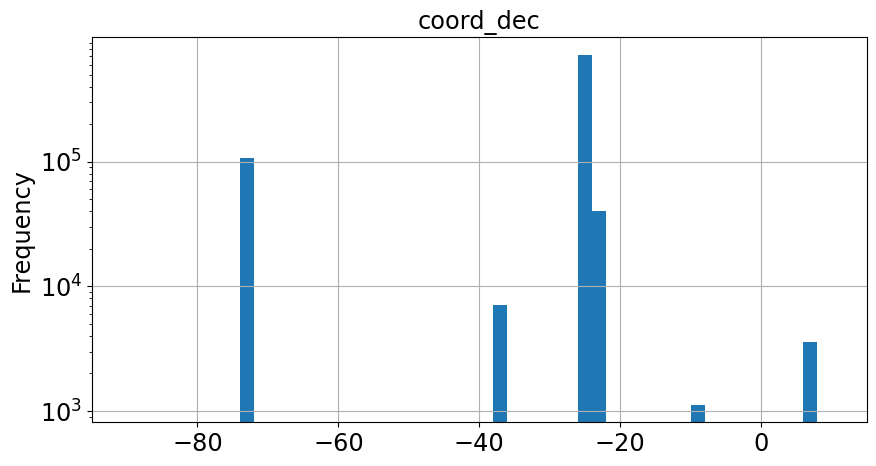

In [24]:
df_sel['coord_dec'].plot(kind="hist",bins=50 ,range=(-90,10),logy=True,title="coord_dec",grid=True,figsize=(10,5))

In [29]:
cut_skyloc = ((df_sel['dec'] < -30) & (df_sel['dec'] > -40) & (df_sel['ra'] > 100) & (df_sel['ra'] < 150))

In [30]:
df_sel = df_sel[cut_skyloc]

<Axes: title={'center': 'psMag'}, ylabel='Frequency'>

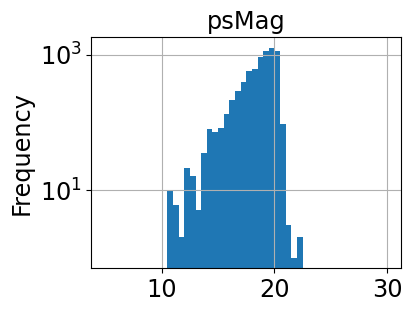

In [33]:
df_sel['psfMag'].plot(kind="hist",bins=50,range=(5,30),logy=True,grid=True,title="psMag")

<Axes: title={'center': 'gaussianMag'}, ylabel='Frequency'>

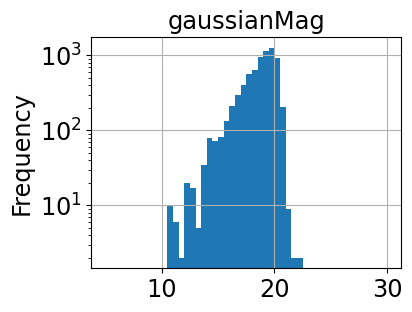

In [34]:
df_sel['gaussianMag'].plot(kind="hist",bins=50 ,range=(5,30),logy=True,grid=True,title="gaussianMag")

In [35]:
df_sel

,sourceId,ccdVisitId,x,y,ra,dec,coord_ra,coord_dec,psfFlux,gaussianFlux,visit,band,visid_idx,mjd,dateobs,extendedness_flag,detect_isPrimary,psfMag,gaussianMag
23035,177963176795570185,42429727744,2764.321548,58.721643,120.103934,-36.246512,120.103934,-36.246512,40172.874442,4.200417e+04,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,True,19.890168,19.841769
23036,177963176795570186,42429727744,3000.798120,92.290371,120.111713,-36.245538,120.111713,-36.245538,978141.947126,1.027555e+06,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,True,16.423995,16.370488
23037,177963176795570187,42429727744,2895.967729,91.778558,120.108258,-36.245588,120.108258,-36.245588,84642.802642,8.190376e+04,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,True,19.081025,19.116740
23038,177963176795570188,42429727744,1084.661572,103.300225,120.048558,-36.245896,120.048558,-36.245896,623007.768903,6.194798e+05,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,False,16.913766,16.919932
23039,177963176795570189,42429727744,1215.076290,94.886136,120.052860,-36.246077,120.052860,-36.246077,100198.405339,9.379923e+04,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,True,18.897848,18.969502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355980,177963193975440217,42429731840,423.541063,3802.137271,120.042974,-36.146995,120.042974,-36.146995,96565.658085,9.696308e+04,2023110700596,i,1653,60256.352940,2023-11-08 08:28:14.020,False,True,18.937943,18.933484
1355981,177963193975440218,42429731840,436.662750,3835.406605,120.043392,-36.146107,120.043392,-36.146107,28787.907148,2.516315e+04,2023110700596,i,1653,60256.352940,2023-11-08 08:28:14.020,False,True,20.251975,20.398087
1355982,177963193975440219,42429731840,2756.261149,3824.351769,120.119747,-36.145621,120.119747,-36.145621,51769.097082,4.754794e+04,2023110700596,i,1653,60256.352940,2023-11-08 08:28:14.020,False,True,19.614824,19.707171
1355983,177963193975440220,42429731840,2779.671674,3824.699047,120.120517,-36.145604,120.120517,-36.145604,46719.711458,4.410055e+04,2023110700596,i,1653,60256.352940,2023-11-08 08:28:14.020,False,True,19.726250,19.788890


In [43]:
#df_sel.groupby(df_sel['dateobs'].dt.date).size().plot()
datetime = pd.to_datetime(df_sel['dateobs'])

In [40]:
df_sel['dateobs'].max()

'2023-11-08 08:28:14.020'

In [44]:
df_sel["date"] = df["dateobs"].astype("datetime64")

/tmp/ipykernel_57603/2547006556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["date"] = df["dateobs"].astype("datetime64")


In [45]:
df_sel

,sourceId,ccdVisitId,x,y,ra,dec,coord_ra,coord_dec,psfFlux,gaussianFlux,visit,band,visid_idx,mjd,dateobs,extendedness_flag,detect_isPrimary,psfMag,gaussianMag,date
23035,177963176795570185,42429727744,2764.321548,58.721643,120.103934,-36.246512,120.103934,-36.246512,40172.874442,4.200417e+04,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,True,19.890168,19.841769,2023-11-08 08:10:17.148
23036,177963176795570186,42429727744,3000.798120,92.290371,120.111713,-36.245538,120.111713,-36.245538,978141.947126,1.027555e+06,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,True,16.423995,16.370488,2023-11-08 08:10:17.148
23037,177963176795570187,42429727744,2895.967729,91.778558,120.108258,-36.245588,120.108258,-36.245588,84642.802642,8.190376e+04,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,True,19.081025,19.116740,2023-11-08 08:10:17.148
23038,177963176795570188,42429727744,1084.661572,103.300225,120.048558,-36.245896,120.048558,-36.245896,623007.768903,6.194798e+05,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,False,16.913766,16.919932,2023-11-08 08:10:17.148
23039,177963176795570189,42429727744,1215.076290,94.886136,120.052860,-36.246077,120.052860,-36.246077,100198.405339,9.379923e+04,2023110700580,i,31,60256.340476,2023-11-08 08:10:17.148,False,True,18.897848,18.969502,2023-11-08 08:10:17.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355980,177963193975440217,42429731840,423.541063,3802.137271,120.042974,-36.146995,120.042974,-36.146995,96565.658085,9.696308e+04,2023110700596,i,1653,60256.352940,2023-11-08 08:28:14.020,False,True,18.937943,18.933484,2023-11-08 08:28:14.020
1355981,177963193975440218,42429731840,436.662750,3835.406605,120.043392,-36.146107,120.043392,-36.146107,28787.907148,2.516315e+04,2023110700596,i,1653,60256.352940,2023-11-08 08:28:14.020,False,True,20.251975,20.398087,2023-11-08 08:28:14.020
1355982,177963193975440219,42429731840,2756.261149,3824.351769,120.119747,-36.145621,120.119747,-36.145621,51769.097082,4.754794e+04,2023110700596,i,1653,60256.352940,2023-11-08 08:28:14.020,False,True,19.614824,19.707171,2023-11-08 08:28:14.020
1355983,177963193975440220,42429731840,2779.671674,3824.699047,120.120517,-36.145604,120.120517,-36.145604,46719.711458,4.410055e+04,2023110700596,i,1653,60256.352940,2023-11-08 08:28:14.020,False,True,19.726250,19.788890,2023-11-08 08:28:14.020


In [58]:
df_time = df_sel[["date"]]

In [59]:
df_time

,date
23035,2023-11-08 08:10:17.148
23036,2023-11-08 08:10:17.148
23037,2023-11-08 08:10:17.148
23038,2023-11-08 08:10:17.148
23039,2023-11-08 08:10:17.148
...,...
1355980,2023-11-08 08:28:14.020
1355981,2023-11-08 08:28:14.020
1355982,2023-11-08 08:28:14.020
1355983,2023-11-08 08:28:14.020


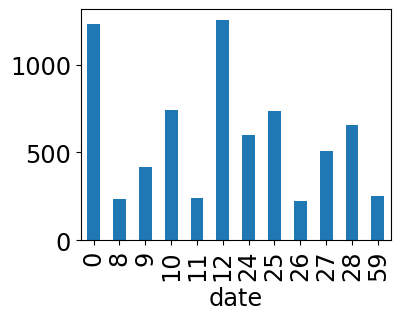

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax = (df_time["date"].groupby(df_time["date"].dt.minute)
                         .count()).plot(kind="bar")